In [1]:
#  Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import files

In [4]:
#  Load the dataset
df = pd.read_csv('Titanic.csv')

In [5]:
#  Explore basic info
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [6]:
#  Handle missing values
# Age — fill with median
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-6-1625503639.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [7]:
# Embarked — fill with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-7-4130368213.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [8]:
# Cabin — drop this column
df.drop('Cabin', axis=1, inplace=True)

In [9]:
#  Convert categorical features into numerical
label_enc = LabelEncoder()

In [10]:
# Convert 'Sex'
df['Sex'] = label_enc.fit_transform(df['Sex'])

In [11]:
# Convert 'Embarked'
df['Embarked'] = label_enc.fit_transform(df['Embarked'])


In [12]:
#  Normalize/standardize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


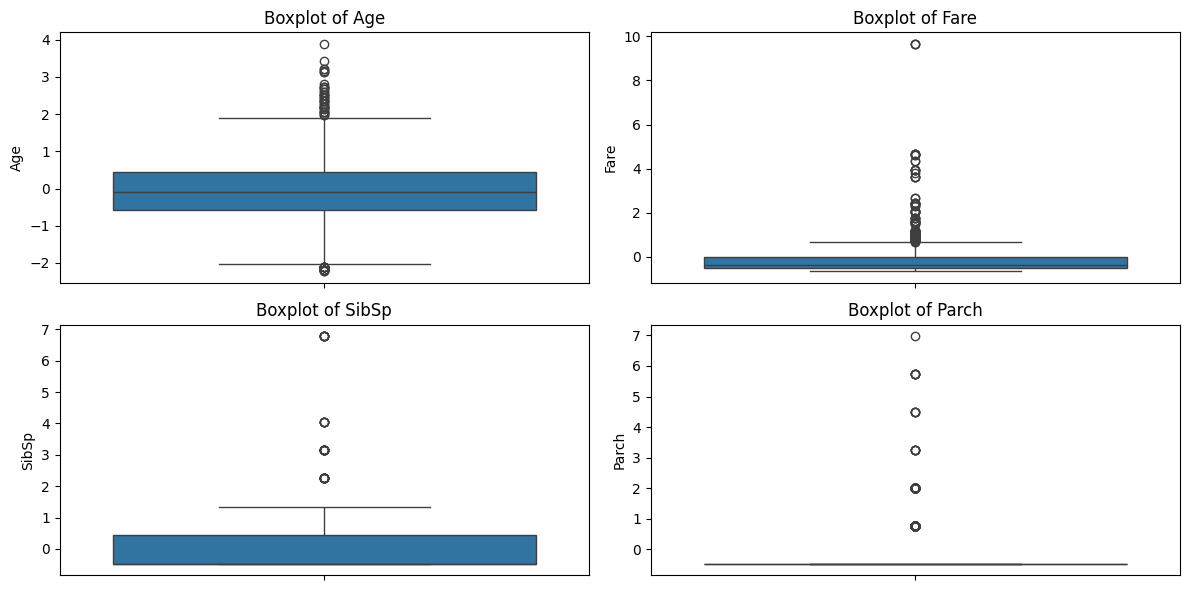

In [13]:
#  Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [14]:
#  Remove outliers using IQR method
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]


In [15]:
#  Final Cleaned Dataset Info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  577 non-null    int64  
 1   Survived     577 non-null    int64  
 2   Pclass       577 non-null    int64  
 3   Name         577 non-null    object 
 4   Sex          577 non-null    int64  
 5   Age          577 non-null    float64
 6   SibSp        577 non-null    float64
 7   Parch        577 non-null    float64
 8   Ticket       577 non-null    object 
 9   Fare         577 non-null    float64
 10  Embarked     577 non-null    int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 54.1+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age     Si